<h1>Tunnuslukuja</h1>

Määrällisille muuttujille lasketaan tyypillisesti keskiarvo, keskihajonta ja viiden luvun yhteenveto.

Määrällisten muuttujien välisiä riippuvuuksia mitataan korrelaatiokertoimilla.

Muistettavat funktiot <b>describe(), pivot_table(), boxplot(), corr(), plot.scatter()</b>

In [1]:
#tuon tarvittavat kirjastot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#avaan Excel-datan dataframeen ja näytän viisi ensimmäistä riviä
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
#määritän muutamia listoja, joita tarvitsen jatkossa
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perhe = ['Perheetön', 'Perheellinen']
sukup = ['Mies', 'Nainen']

<h2>describe() laskee tunnusluvut</h2>

Lukumäärä, keskiarvo, keskihajonta, pienin, alaneljännes, mediaani, yläneljännes, suurin.

In [4]:
#tunnuslukuja kahden desimaalin tarkkuudella
df[['ikä', 'palveluv', 'palkka', 'johto', 'työtov', 'työymp', 
    'palkkat', 'työteht']].describe().style.format('{:.2f}')

,ikä,palveluv,palkka,johto,työtov,työymp,palkkat,työteht
count,82.00,80.00,82.00,82.00,81.00,82.00,82.00,82.00
mean,37.95,12.18,2563.88,3.06,4.06,3.22,2.11,3.20
std,9.77,8.81,849.35,1.06,0.83,1.15,1.11,1.05
min,20.00,0.00,1521.00,1.00,2.00,1.00,1.00,1.00
25%,31.00,3.75,2027.00,2.00,4.00,3.00,1.00,3.00
50%,37.50,12.50,2320.00,3.00,4.00,3.00,2.00,3.00
75%,44.00,18.25,2808.00,4.00,5.00,4.00,3.00,4.00
max,61.00,36.00,6278.00,5.00,5.00,5.00,5.00,5.00


In [5]:
#palkan tunnuslukuja sukupuolittain
#T (transpose) vaihtaa rivit ja sarakkeet päittäin
df1 = df.groupby('sukup')['palkka'].describe().T

#sukupuolen tekstimuotoiset arvot listasta
df1.columns = sukup

df1.style.format('{:.0f}')

,Mies,Nainen
count,63,19
mean,2664,2233
std,930,341
min,1521,1715
25%,2086,1969
50%,2417,2144
75%,2925,2574
max,6278,2729


<h2>pivot_table() on monipuolinen raportointityökalu</h2>

- <b>values</b>: muuttujat, joista lasketaan tunnuslukuja
- <b>index</b>: muuttujat, joiden arvot tulevat vasemman reunan riviotsikoiksi
- <b>columns</b>: muuttujat, joiden arvot tulevat yläreunan sarakeotsikoiksi

Oletuksena pivot-taulukkoon lasketaan keskiarvoja, mutta <b>aggfunc</b>-parametrilla voit määrittää laskettavaksi muita tunnuslukuja.

In [6]:
df2 = df.pivot_table(values = 'palkka', index = 'sukup', columns = 'koulutus')

#rivi- ja sarakeotsikot aiemmin määritellyistä listoista
df2.index = sukup
df2.columns = koulutus

#keskiarvot ilman desimaaleja
df2.style.format('{:.0f}')

,Peruskoulu,2. aste,Korkeakoulu,Ylempi korkeakoulu
Mies,2354,2461,3145,5147
Nainen,2121,2211,2334,nan


In [7]:
#pivot, jossa on kaksi index-muuttujaa
df3 = df.pivot_table(values = 'palkka', index = ['sukup', 'perhe'], columns = 'koulutus')

#palkkakeskiarvot ilman desimaaleja
df3.style.format('{:.0f}')

In [8]:
#hierarkisen indeksin arvot aiemmin määritellyistä sukup- ja perhe-listoista
df3.index = df3.index.set_levels(sukup, level=0)
df3.index = df3.index.set_levels(perhe, level=1)

#sarakeotsikot aiemmin määritellystä koulutus-listasta
df3.columns = koulutus

#tulokset ilman desimaaleja
df3.style.format('{:.0f}')

In [9]:
#pivot-taulukossa voin käyttää monenlaisia funktioita
df4 = df.pivot_table(values = 'palkka', index = 'koulutus', 
                     aggfunc = ['min', 'median', 'mean', 'max'])

df4.index = koulutus

df4.columns = ['pienin', 'mediaani', 'keskiarvo', 'suurin']

df4.style.format('{:.0f}')

,pienin,mediaani,keskiarvo,suurin
Peruskoulu,1638,2144,2310,3587
2. aste,1521,2378,2403,3510
Korkeakoulu,1559,2710,2887,6278
Ylempi korkeakoulu,5069,5147,5147,5225


<h2>boxplot() havainnollistaa viiden luvun yhteenvedon</h2>

Viiden luvun yhteenveto koostuu viidestä tunnusluvusta: pienin, alaneljännes, mediaani, yläneljännes ja suurin. 

Seaborn-kirjaston Ruutu- ja janakaavio (boxplot) on hyvä tapa havainnollistaa viiden luvun yhteenveto. Jos mukana on poikkeavia havaintoja, niin ne esitetään erillisinä pisteinä. Poikkeava havainto: yli 1,5 laatikon (laatikko on alaneljänneksen ja yläneljänneksen välissä) korkeuden päässä laatikon alareunasta tai yläreunasta.

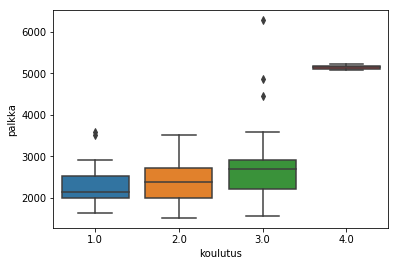

In [10]:
sns.boxplot(x=df['koulutus'], y=df['palkka'])

<h2>Riippuvuuksien tarkastelu</h2>

<b>corr()</b>-funktio laskee korrelaatiot ja seaborn-kirjaston <b>jointplot</b> havainnollistaa riippuvuutta.

In [11]:
#korrelaatiokertoimia kahden desimaalin tarkkuudella
df[['ikä', 'palveluv', 'palkka']].corr().style.format('{:.2f}')

,ikä,palveluv,palkka
ikä,1.00,0.53,0.30
palveluv,0.53,1.00,0.24
palkka,0.30,0.24,1.00


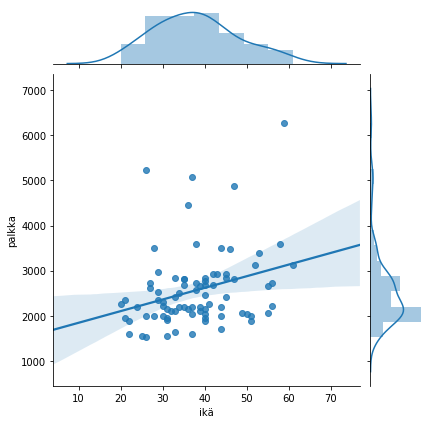

In [12]:
sns.jointplot(x=df['ikä'], y=df['palkka'], kind='reg')